#### ***CAPSTONE PROJECT 2023-2024***
***AUTOMATED PLANT MONITORING AND CARE SYSTEM***
<hr>

***BY:***
***Pranjal Arora, Naga Madhurya Peram, Piyush Sharma, Archita Gautam***

<hr>

<br> 

__IMPORTING LIBRARIES AND CONFIGURING GPU__

In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only allocate 1GB * 2 of memory on the first GPU
    try:
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024 * 2)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Virtual devices must be set before GPUs have been initialized
        print(e)

C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\sushant\anaconda3\envs\project\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os,cv2

In [3]:
directory="PlantVillagedata/"
classses=os.listdir(directory)

In [4]:
classses

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus']

__READING IMAGES__

In [5]:
import os
import cv2
image_size=224
data1=[]#empty list
for category in classses:
    path = os.path.join(directory, category)
    print(path)
    label = classses.index(category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
#         print("img path")
#         print(img_path)
        arr = cv2.imread(img_path)#Reading Images
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2RGB)
        new_arr = cv2.resize(arr, (image_size, image_size))#Resizing into same shape
        data1.append([new_arr, label])

PlantVillagedata/Pepper__bell___Bacterial_spot
PlantVillagedata/Pepper__bell___healthy
PlantVillagedata/Potato___Early_blight
PlantVillagedata/Potato___healthy
PlantVillagedata/Potato___Late_blight
PlantVillagedata/Tomato_Bacterial_spot
PlantVillagedata/Tomato_Early_blight
PlantVillagedata/Tomato_healthy
PlantVillagedata/Tomato_Late_blight
PlantVillagedata/Tomato_Leaf_Mold
PlantVillagedata/Tomato_Septoria_leaf_spot
PlantVillagedata/Tomato__Target_Spot
PlantVillagedata/Tomato__Tomato_mosaic_virus


In [6]:
import random
random.shuffle(data1)

In [7]:
len(data1)

1307

In [8]:
x=[]#independent
y=[]#dependent
for features,labels in data1:
    x.append(features)
    y.append(labels)

In [9]:
x=np.array(x)
y=np.array(y)

__TRAINING DATASET__

In [10]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

__MODELS USED:__
1. INCEPTION CNN MODEL
2. RESNET50 CNN MODEL

<hr>

1. __SEQUENTIAL INCEPTION V3 CNN MODEL__

In [11]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
model = Sequential()
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(classses), activation='softmax'))
model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [12]:
progess = model.fit(x=X_train,y=y_train,epochs=5,validation_data= (X_test, y_test), batch_size=32)

Epoch 1/5
33/33 [==============================] - 277s 8s/step - loss: 2.3344 - accuracy: 0.2498 - val_loss: 2.4682 - val_accuracy: 0.1947
Epoch 2/5
33/33 [==============================] - 273s 8s/step - loss: 0.9499 - accuracy: 0.6947 - val_loss: 1.4726 - val_accuracy: 0.4656
Epoch 3/5
33/33 [==============================] - 274s 8s/step - loss: 0.2911 - accuracy: 0.9187 - val_loss: 0.9452 - val_accuracy: 0.6947
Epoch 4/5
33/33 [==============================] - 274s 8s/step - loss: 0.1442 - accuracy: 0.9598 - val_loss: 0.5987 - val_accuracy: 0.7786
Epoch 5/5
33/33 [==============================] - 276s 8s/step - loss: 0.0800 - accuracy: 0.9789 - val_loss: 0.5407 - val_accuracy: 0.8244


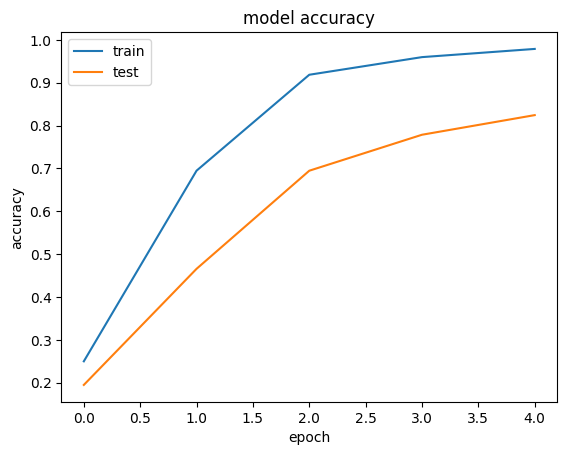

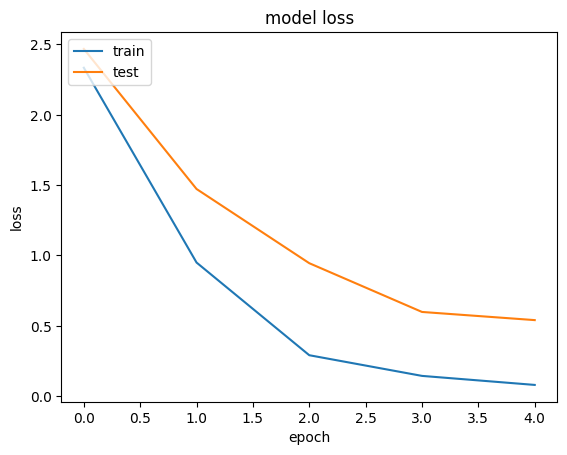

In [13]:
plt.plot(progess.history['accuracy'])
plt.plot(progess.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess.history['loss'])
plt.plot(progess.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

__PREDICTIONS__

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

In [15]:
y_pred_new=[]
for i in y_pred:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new.append(y)
    #break

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new, target_names=classses))

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.96      0.92      0.94        26
       Pepper__bell___healthy       0.93      0.93      0.93        15
        Potato___Early_blight       0.86      0.89      0.87        27
             Potato___healthy       0.89      1.00      0.94        16
         Potato___Late_blight       0.66      0.95      0.78        20
        Tomato_Bacterial_spot       0.90      0.82      0.86        22
          Tomato_Early_blight       0.67      0.53      0.59        19
               Tomato_healthy       0.81      1.00      0.90        13
           Tomato_Late_blight       1.00      0.35      0.52        20
             Tomato_Leaf_Mold       0.93      0.87      0.90        15
    Tomato_Septoria_leaf_spot       0.79      0.76      0.78        25
          Tomato__Target_Spot       0.86      0.78      0.82        23
  Tomato__Tomato_mosaic_virus       0.70      1.00      0.82        21

    

<AxesSubplot:>

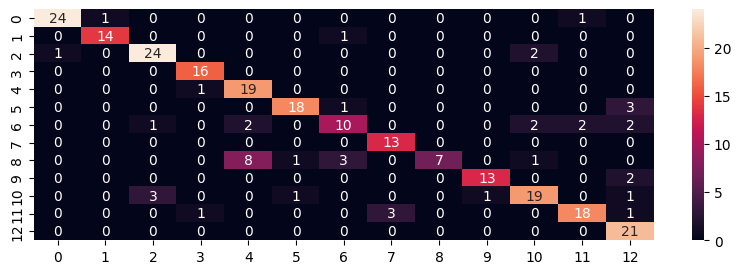

In [17]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [18]:
model.save("model/inception_classifier.hp5")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model/inception_classifier.hp5\assets


<br>

<hr>

2. __RESNET 50 CNN MODEL__

In [19]:
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential ,Model, load_model
from tensorflow.keras.layers import Dropout, Flatten, Dense ,Dropout

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
res_model = Sequential()
res_model.add(base_model)
res_model.add(Flatten(input_shape=base_model.output_shape[1:]))
res_model.add(Dense(256, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(128, activation='relu'))
res_model.add(Dropout(0.2))
res_model.add(Dense(len(classses), activation='softmax'))
res_model = Model(inputs=res_model.input, outputs=res_model.output)
res_model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['accuracy'])

In [20]:
progess1 = res_model.fit(x=X_train,y=y_train,epochs=7,validation_data= (X_test, y_test), batch_size=128)

Epoch 1/7
9/9 [==============================] - 1103s 123s/step - loss: 2.3984 - accuracy: 0.3053 - val_loss: 2.2522 - val_accuracy: 0.3359
Epoch 2/7
9/9 [==============================] - 1031s 115s/step - loss: 0.5377 - accuracy: 0.8230 - val_loss: 2.5158 - val_accuracy: 0.4160
Epoch 3/7
9/9 [==============================] - 1047s 116s/step - loss: 0.1765 - accuracy: 0.9493 - val_loss: 2.3419 - val_accuracy: 0.5229
Epoch 4/7
9/9 [==============================] - 1050s 117s/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 2.5236 - val_accuracy: 0.5496
Epoch 5/7
9/9 [==============================] - 1062s 118s/step - loss: 0.0363 - accuracy: 0.9904 - val_loss: 2.2618 - val_accuracy: 0.5763
Epoch 6/7
9/9 [==============================] - 1050s 117s/step - loss: 0.0279 - accuracy: 0.9904 - val_loss: 2.1854 - val_accuracy: 0.6221
Epoch 7/7
9/9 [==============================] - 1000s 111s/step - loss: 0.0257 - accuracy: 0.9943 - val_loss: 1.8343 - val_accuracy: 0.6450


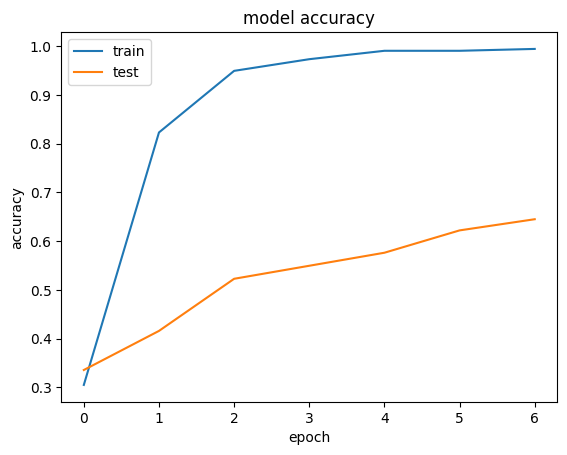

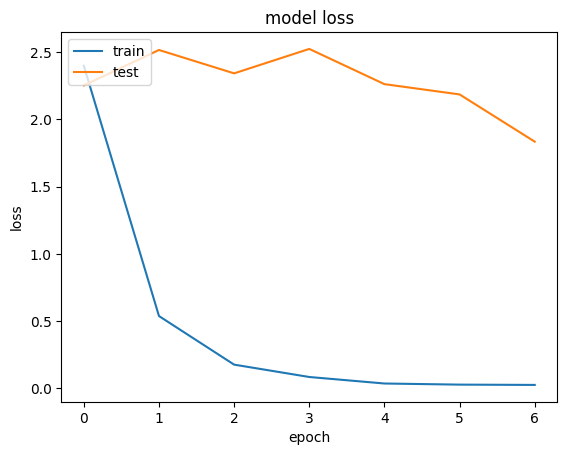

In [21]:
plt.plot(progess1.history['accuracy'])
plt.plot(progess1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(progess1.history['loss'])
plt.plot(progess1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred1 = res_model.predict(X_test)

In [23]:
y_pred_new1=[]
for i in y_pred1:
    #print(i)
    #break
    y=np.argmax(i)
    #break
    #print(y)
    y_pred_new1.append(y)
    #break

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_new1, target_names=classses))

                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.89      0.65      0.76        26
       Pepper__bell___healthy       0.68      0.87      0.76        15
        Potato___Early_blight       1.00      0.74      0.85        27
             Potato___healthy       0.57      1.00      0.73        16
         Potato___Late_blight       0.65      0.55      0.59        20
        Tomato_Bacterial_spot       1.00      0.09      0.17        22
          Tomato_Early_blight       1.00      0.11      0.19        19
               Tomato_healthy       0.46      1.00      0.63        13
           Tomato_Late_blight       0.78      0.35      0.48        20
             Tomato_Leaf_Mold       0.71      0.67      0.69        15
    Tomato_Septoria_leaf_spot       0.46      0.92      0.61        25
          Tomato__Target_Spot       0.58      0.61      0.60        23
  Tomato__Tomato_mosaic_virus       0.70      1.00      0.82        21

    

<AxesSubplot:>

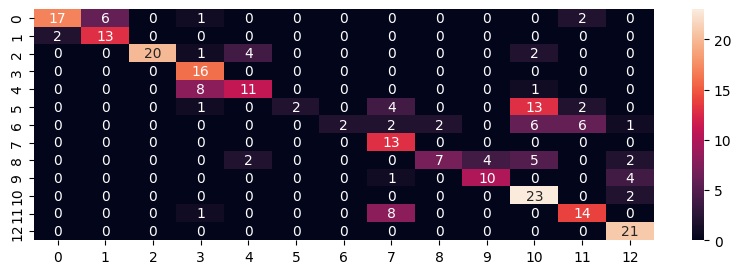

In [25]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_pred_new1)
import pandas as pd
df_cm=pd.DataFrame(cm)
import seaborn as sns
plt.figure(figsize = (10,3))
sns.heatmap(df_cm, annot=True)

In [ ]:

res_model.save("model/resnet_classifier.hp5")

<hr>

__USING RESNET CLASSIFIER ON OUR DATASET FOR PREDICTIONS__

In [ ]:
import numpy as np
import os,cv2

for i in os.listdir("testplant/"):
    print(i)
    
    from tensorflow import keras
    model = keras.models.load_model('model/resnet_classifier.hp5')
    from keras.preprocessing import image
    image_size=224
    #img = cv2.imread(path1+"//"+i)
    path="testplant/"+i
    img = image.load_img(path, target_size=(image_size, image_size))
    x = image.img_to_array(img)
    print(type(x))
    img_4d=x.reshape(1,224,224,3)
    #img_4d=img_4d/255
    model = keras.models.load_model('model/resnet_classifier.hp5')
    predictions = model.predict(img_4d)
    print(predictions[0])
    new_pred=np.argmax(predictions[0])
    print(new_pred)
#     ['COVID19', 'NORMAL', 'OTHERS', 'PNEUMONIA', 'TUBERCOLOSIS']
    dict1={0:'Pepper__bell___Bacterial_spot',1:'Pepper__bell___healthy',2:'Potato___Early_blight',3:'Potato___healthy',4:'Potato___Late_blight',5:'Tomato_Bacterial_spot',6:'Tomato_Early_blight',7:'Tomato_Bacterial_spot',8:'Tomato_Early_blight',9:'Tomato_healthy',10:'Tomato_Late_blight',11:'Tomato_Leaf_Mold',12:'Tomato_Septoria_leaf_spot',13:'Tomato__Target_Spot',14:'Tomato__Tomato_mosaic_virus'}
    list1=['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus']
    a=dict1[new_pred]
    
    print(str(a)+" Detected in Image")
    print("-----------------------------------------------")
    #break
    

206df1c4-53c0-4678-9d2a-61f431aa7e73___JR_HL 8168.JPG
<class 'numpy.ndarray'>
